In [1]:
## Sport Vector Machine 

In [7]:
# we use tis for binaary classifiaction /but we will solve the problem by SVM 
# this is used same in logistic regression. 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
bank_data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Churn_Modelling.csv?raw=True')
bank_data.head()

# this data we want bank employeee not to leave and give hi better offer as 
# per sorting the data . we going to sovle this problem by usifn SVM ( sport Vector Machine )

# SVM lies in a Supervised learning 
# and it is used in classifications dn regresion analysis . 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# first we willvisualize the data with graph so to get more inforamtion . 

In [13]:
bank_data[bank_data['Exited']==1].sample(500)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
444,445,15787470,Parkinson,553,Spain,Male,47,3,116528.15,1,0,0,145704.19,1
4447,4448,15716381,Greece,666,Germany,Female,50,7,109062.28,1,1,1,140136.10,1
5750,5751,15583392,Woronoff,747,Germany,Male,37,9,135776.36,3,1,0,85470.45,1
467,468,15593782,Brookes,816,Germany,Female,38,5,130878.75,3,1,0,71905.77,1
6246,6247,15771442,Pennington,633,France,Male,40,4,150578.00,1,0,1,34670.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,4900,15696852,Hsu,803,France,Female,32,9,192122.84,1,1,1,54277.45,1
2928,2929,15581198,Jenkins,668,Germany,Female,39,0,122104.79,1,1,0,112946.67,1
3532,3533,15755077,Norton,778,Germany,Female,37,0,105617.73,2,1,1,133699.82,1
4744,4745,15582849,McIntosh,757,France,Female,51,1,0.00,1,1,1,22835.13,1


In [14]:
# to make iit manually 

exited_counts = bank_data['Exited'].value_counts()
exited_counts 

Exited
0    7963
1    2037
Name: count, dtype: int64

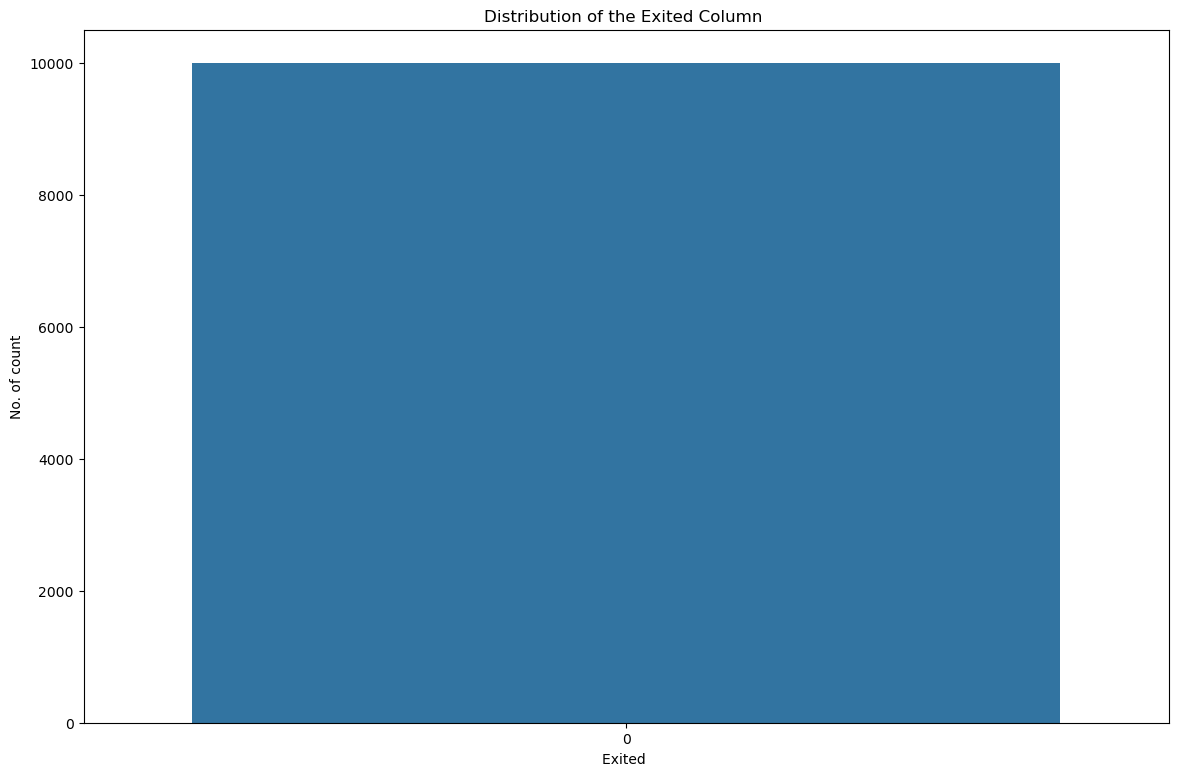

In [15]:
plt.figure(figsize=(14,9))
sns.countplot(bank_data['Exited'])
plt.xlabel("Exited ")
plt.ylabel('No. of count')
plt.title('Distribution of the Exited Column ')
plt.show()

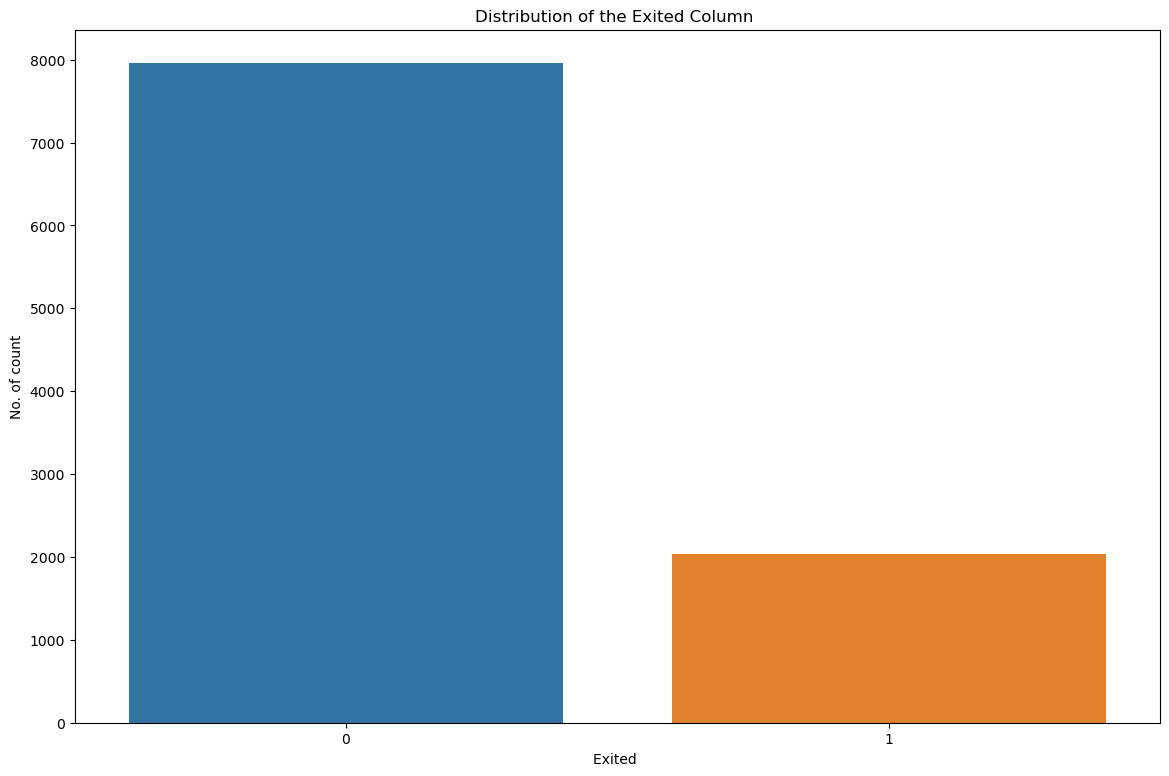

In [16]:
plt.figure(figsize=(14,9))
sns.barplot(x=exited_counts.index,y = exited_counts)
plt.xlabel("Exited ")
plt.ylabel('No. of count')
plt.title('Distribution of the Exited Column ')
plt.show()

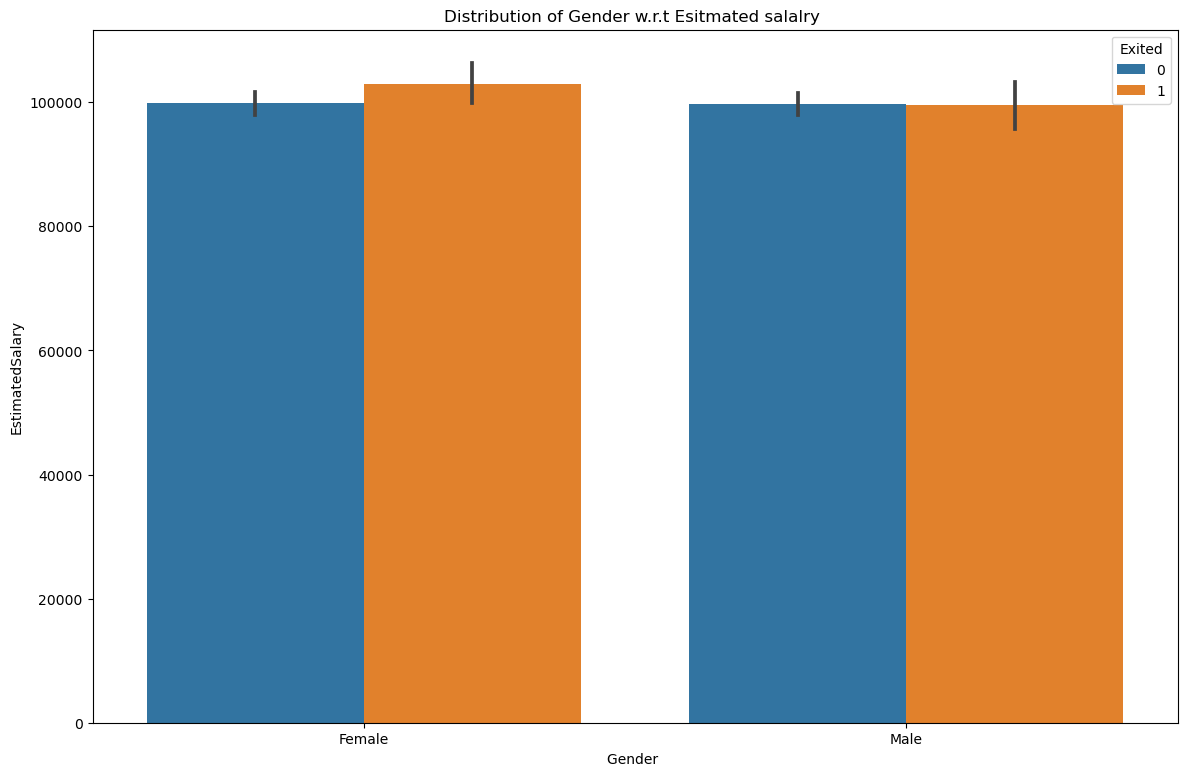

In [11]:
plt.figure(figsize=(14,9))
sns.barplot(data = bank_data, x= 'Gender' , y = 'EstimatedSalary' ,hue='Exited')
plt.xlabel("Gender ")
plt.ylabel('EstimatedSalary')
plt.title('Distribution of Gender w.r.t Esitmated salalry ')
plt.show()

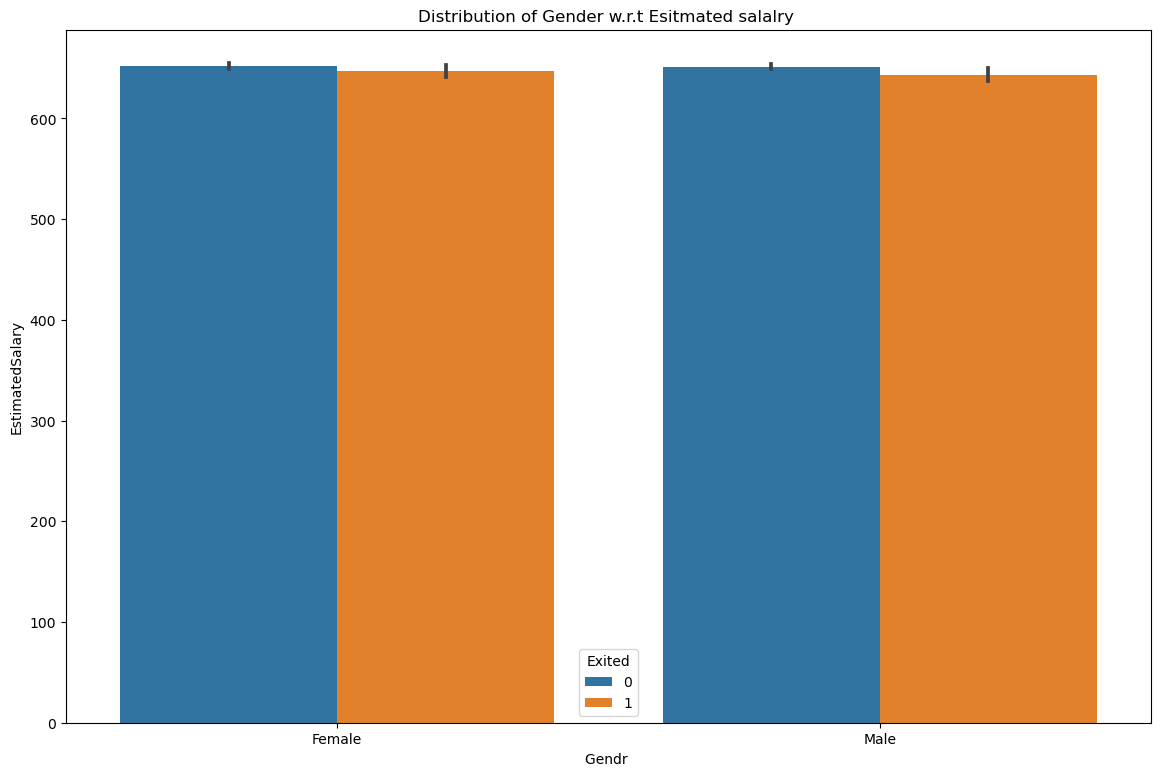

In [12]:
plt.figure(figsize=(14,9))
sns.barplot(data = bank_data, x= 'Gender' , y = 'CreditScore' ,hue='Exited')
plt.xlabel("Gendr ")
plt.ylabel('EstimatedSalary')
plt.title('Distribution of Gender w.r.t Esitmated salalry ')
plt.show()

In [13]:
# now with the help of visiualtion we are not able tto find any excat reason so 
# that why we are goign to use the machine learning conpet to further figure it out 

In [41]:
bank_data['Gender'] = bank_data['Gender'].map({'Male':0,'Female':1})

In [42]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

In [43]:
one_hot_encoder.fit(bank_data[['Geography']])

OneHotEncoder()

In [44]:
temp = one_hot_encoder.transform(bank_data[['Geography']]).toarray()

In [45]:
one_hot_encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [59]:
temp_data = pd.DataFrame(data=temp,
                        columns = ['France', 'Germany', 'Spain'],
                        dtype = 'int')

In [60]:
temp_data.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [61]:
bank_data =  pd.concat([bank_data,temp_data],axis=1)

In [62]:
bank_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,France,Germany,Spain,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,0,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0,0,1,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,0,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0,0,1,0,0,1


In [63]:
# we need  to drop the columns 

In [64]:
bank_data.drop(['RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

KeyError: "['RowNumber' 'CustomerId' 'Surname' 'Geography'] not found in axis"

In [65]:
X = bank_data.drop('Exited',axis=1)
Y = bank_data['Exited']

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [67]:
from sklearn.svm import SVC # Sport Vector Classifier as our problem is of classification . CHecke this out 

svm_model = SVC()

In [68]:
svm_model.fit(X_train,Y_train)

SVC()

In [69]:
predictions = svm_model.predict(X_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix 

print(confusion_matrix(predictions,Y_test))

[[1573  427]
 [   0    0]]


In [71]:
print (classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.79      2000
   macro avg       0.50      0.39      0.44      2000
weighted avg       1.00      0.79      0.88      2000



C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Manually Splitting our Data into Trainiang and Testing 

In [72]:
bank_data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
bank_exited_1 = bank_data[bank_data['Exited'] == 1]

In [ ]:
bank_exited_0 = bank_data[bank_data['Exited'] == 0]

In [ ]:
bank_exited_1.info()

In [80]:
train_0 = bank_exited_0.sample(frac=1).iloc[:6371]
test_0 = bank_exited_0.sample(frac=1).iloc[6371:]

NameError: name 'bank_exited_0' is not defined

In [81]:
train_1 = bank_exited_1.sample(frac=1).iloc[:1630]
test_1 = bank_exited_1.sample(frac=1).iloc[1630:]

NameError: name 'bank_exited_1' is not defined

In [82]:
training  = pd.concat([train_0,train_1])

NameError: name 'train_0' is not defined

In [83]:
testing  = pd.concat([test_0,test_1])

NameError: name 'test_0' is not defined

In [84]:
X_train = training.drop('Exited',axis=1)
Y_train = training['Exited']
X_test = testing.drop('Exited',axis=1)
Y_test = testing['Exited']

NameError: name 'training' is not defined

In [85]:
testing.head()

NameError: name 'testing' is not defined

In [86]:
bank_data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [87]:
params= {
    'C' : [0.0001,0.001,0.01,0.1,10,100,1000,10000],
    'gamma':[10,1,0.1,0.01,0.0001,0.00001,0.000001,0.0000001]
}

In [88]:
params= {
    'C' : [0.0001,0.001,0.01,0.1],
    'gamma':[10,1,0.1,0.01]
}

In [89]:
from sklearn.model_selection import GridSearchCV 

grid_model = GridSearchCV(SVC(),params,verbose=2)

In [ ]:
grid_model.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=0.0001, gamma=10; total time=   3.2s
[CV] END .................................C=0.0001, gamma=10; total time=   4.1s
[CV] END .................................C=0.0001, gamma=10; total time=   3.9s
[CV] END .................................C=0.0001, gamma=10; total time=   4.0s
[CV] END .................................C=0.0001, gamma=10; total time=   4.0s
[CV] END ..................................C=0.0001, gamma=1; total time=   3.9s
[CV] END ..................................C=0.0001, gamma=1; total time=   4.3s
[CV] END ..................................C=0.0001, gamma=1; total time=   3.8s
[CV] END ..................................C=0.0001, gamma=1; total time=   4.3s
[CV] END ..................................C=0.0001, gamma=1; total time=   3.7s
[CV] END ................................C=0.0001, gamma=0.1; total time=   3.8s
[CV] END ................................C=0.000